#### Library

In [1]:
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

#### Data Loading

In [2]:
df_raw = pd.read_excel("Luas_Panen_Produksi_dan_Produktivitas_Padi_Menurut_Provinsi.xlsx")
df_raw

,Provinsi,Tahun,Luas Panen (ha),Produktivitas (ku/ha),Produksi (ton)
0,ACEH,2018,329515.78,56.49,1861567.1
1,ACEH,2019,310012.46,55.3,1714437.6
2,ACEH,2020,317869.41,55.28,1757313.07
3,ACEH,2021,297058.38,55.03,1634639.6
4,ACEH,2022,271750.2,55.55,1509456
...,...,...,...,...,...
268,INDONESIA,2020,10657274.96,51.28,54649202.24
269,INDONESIA,2021,10411801.22,52.26,54415294.22
270,INDONESIA,2022,10452672,52.38,54748977
271,INDONESIA,2023,10213705.17,52.85,53980993.19


In [3]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Provinsi               273 non-null    object
 1   Tahun                  273 non-null    int64 
 2   Luas Panen (ha)        273 non-null    object
 3   Produktivitas (ku/ha)  273 non-null    object
 4   Produksi (ton)         273 non-null    object
dtypes: int64(1), object(4)
memory usage: 10.8+ KB


In [4]:
df_raw.isna().sum()

Provinsi                 0
Tahun                    0
Luas Panen (ha)          0
Produktivitas (ku/ha)    0
Produksi (ton)           0
dtype: int64

#### Data Cleaning

In [5]:
df_raw = df_raw.replace("-", "0")
df_raw

,Provinsi,Tahun,Luas Panen (ha),Produktivitas (ku/ha),Produksi (ton)
0,ACEH,2018,329515.78,56.49,1861567.1
1,ACEH,2019,310012.46,55.3,1714437.6
2,ACEH,2020,317869.41,55.28,1757313.07
3,ACEH,2021,297058.38,55.03,1634639.6
4,ACEH,2022,271750.2,55.55,1509456
...,...,...,...,...,...
268,INDONESIA,2020,10657274.96,51.28,54649202.24
269,INDONESIA,2021,10411801.22,52.26,54415294.22
270,INDONESIA,2022,10452672,52.38,54748977
271,INDONESIA,2023,10213705.17,52.85,53980993.19


In [6]:
df_raw = df_raw.apply(pd.to_numeric, errors='ignore')
df_raw

C:\Users\eldim\AppData\Local\Temp\ipykernel_6744\4032122956.py:1: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df_raw = df_raw.apply(pd.to_numeric, errors='ignore')


,Provinsi,Tahun,Luas Panen (ha),Produktivitas (ku/ha),Produksi (ton)
0,ACEH,2018,329515.78,56.49,1861567.10
1,ACEH,2019,310012.46,55.30,1714437.60
2,ACEH,2020,317869.41,55.28,1757313.07
3,ACEH,2021,297058.38,55.03,1634639.60
4,ACEH,2022,271750.20,55.55,1509456.00
...,...,...,...,...,...
268,INDONESIA,2020,10657274.96,51.28,54649202.24
269,INDONESIA,2021,10411801.22,52.26,54415294.22
270,INDONESIA,2022,10452672.00,52.38,54748977.00
271,INDONESIA,2023,10213705.17,52.85,53980993.19


In [7]:
df_raw["Tahun"] = pd.to_datetime(df_raw.Tahun, format='%Y')
df_raw

,Provinsi,Tahun,Luas Panen (ha),Produktivitas (ku/ha),Produksi (ton)
0,ACEH,2018-01-01,329515.78,56.49,1861567.10
1,ACEH,2019-01-01,310012.46,55.30,1714437.60
2,ACEH,2020-01-01,317869.41,55.28,1757313.07
3,ACEH,2021-01-01,297058.38,55.03,1634639.60
4,ACEH,2022-01-01,271750.20,55.55,1509456.00
...,...,...,...,...,...
268,INDONESIA,2020-01-01,10657274.96,51.28,54649202.24
269,INDONESIA,2021-01-01,10411801.22,52.26,54415294.22
270,INDONESIA,2022-01-01,10452672.00,52.38,54748977.00
271,INDONESIA,2023-01-01,10213705.17,52.85,53980993.19


In [8]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Provinsi               273 non-null    object        
 1   Tahun                  273 non-null    datetime64[ns]
 2   Luas Panen (ha)        273 non-null    float64       
 3   Produktivitas (ku/ha)  273 non-null    float64       
 4   Produksi (ton)         273 non-null    float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 10.8+ KB


In [9]:
df_raw.to_excel("Luas_Panen_Produksi_dan_Produktivitas_Padi_Menurut_Provinsi_Cleaned.xlsx", index=False)

#### EDA

In [10]:
df_clean = pd.read_excel("Luas_Panen_Produksi_dan_Produktivitas_Padi_Menurut_Provinsi_Cleaned.xlsx")
df_clean

,Provinsi,Tahun,Luas Panen (ha),Produktivitas (ku/ha),Produksi (ton)
0,ACEH,2018-01-01,329515.78,56.49,1861567.10
1,ACEH,2019-01-01,310012.46,55.30,1714437.60
2,ACEH,2020-01-01,317869.41,55.28,1757313.07
3,ACEH,2021-01-01,297058.38,55.03,1634639.60
4,ACEH,2022-01-01,271750.20,55.55,1509456.00
...,...,...,...,...,...
268,INDONESIA,2020-01-01,10657274.96,51.28,54649202.24
269,INDONESIA,2021-01-01,10411801.22,52.26,54415294.22
270,INDONESIA,2022-01-01,10452672.00,52.38,54748977.00
271,INDONESIA,2023-01-01,10213705.17,52.85,53980993.19


In [11]:
df_skip = pd.read_excel("Luas_Panen_Produksi_dan_Produktivitas_Padi_Menurut_Provinsi_Cleaned.xlsx", skipfooter=7)
df_skip

,Provinsi,Tahun,Luas Panen (ha),Produktivitas (ku/ha),Produksi (ton)
0,ACEH,2018-01-01,329515.78,56.49,1861567.10
1,ACEH,2019-01-01,310012.46,55.30,1714437.60
2,ACEH,2020-01-01,317869.41,55.28,1757313.07
3,ACEH,2021-01-01,297058.38,55.03,1634639.60
4,ACEH,2022-01-01,271750.20,55.55,1509456.00
...,...,...,...,...,...
261,PAPUA PEGUNUNGAN,2020-01-01,0.00,0.00,0.00
262,PAPUA PEGUNUNGAN,2021-01-01,0.00,0.00,0.00
263,PAPUA PEGUNUNGAN,2022-01-01,0.00,0.00,0.00
264,PAPUA PEGUNUNGAN,2023-01-01,14.14,43.59,61.63


C:\Users\eldim\AppData\Local\Temp\ipykernel_6744\1831631922.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=df_grouped["Provinsi"], x=df_grouped["Produksi (ton)"], palette="coolwarm")


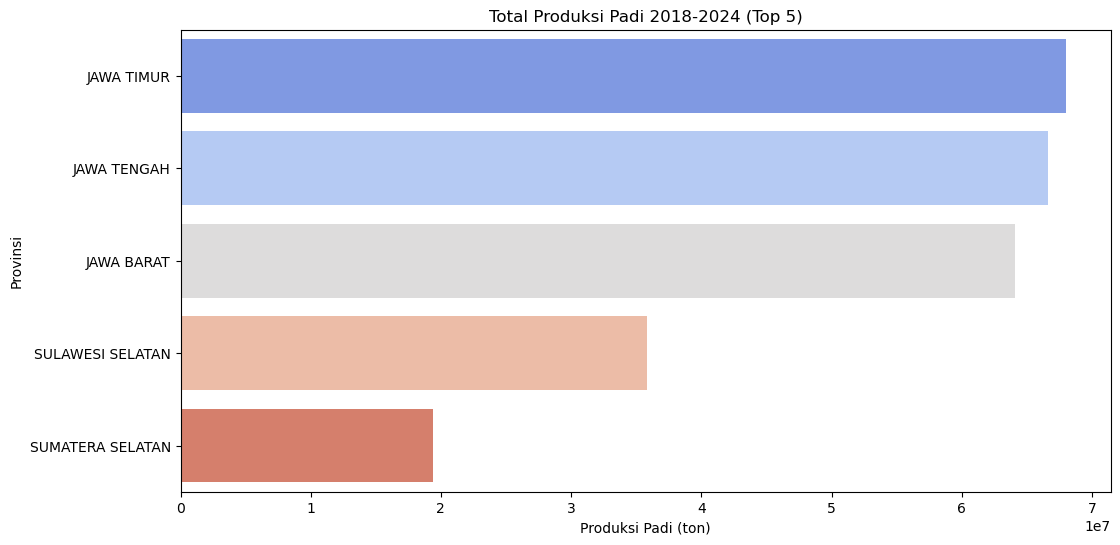

In [ ]:
# Membuat Group
df_grouped = df_skip.groupby("Provinsi")["Produksi (ton)"].sum().reset_index()
df_grouped = df_grouped.sort_values(by="Produksi (ton)", ascending=False).head(5)

# Menampilkan Bar Chart
plt.figure(figsize=(12,6))
sns.barplot(y=df_grouped["Provinsi"], x=df_grouped["Produksi (ton)"], palette="coolwarm")
plt.title("Total Produksi Padi 2018-2024 (Top 5)")
plt.xlabel("Produksi Padi (ton)")
plt.ylabel("Provinsi")
plt.show()

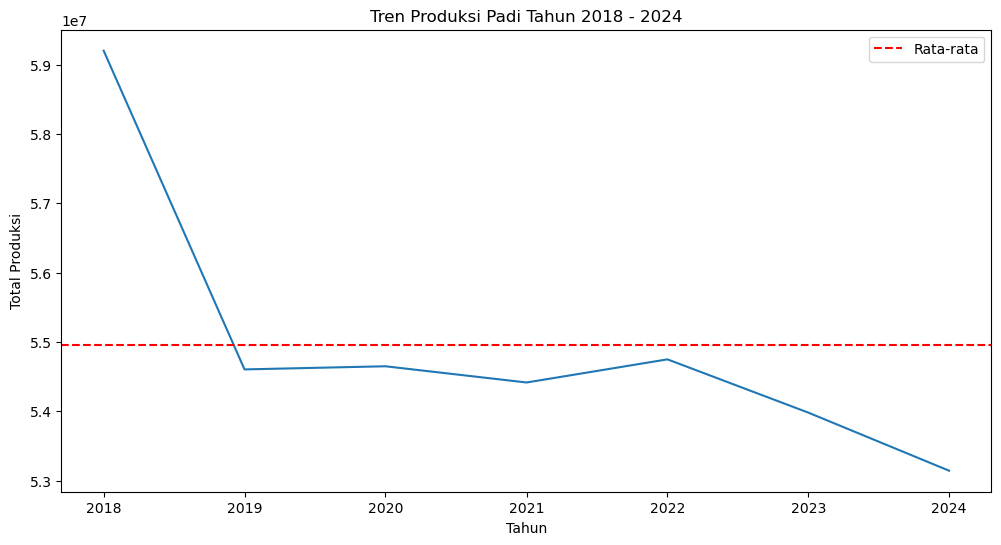

In [ ]:
# Membuat Group
yearly = df_skip.groupby("Tahun")["Produksi (ton)"].sum()

# Membuat Plot
plt.figure(figsize=(12,6))
sns.lineplot(x=yearly.index, y=yearly.values)
plt.axhline(y=yearly.mean(), color="r", linestyle="--", label="Rata-rata")
plt.title("Tren Produksi Padi Tahun 2018 - 2024")
plt.xlabel("Tahun")
plt.ylabel("Total Produksi")
plt.legend()
plt.show()

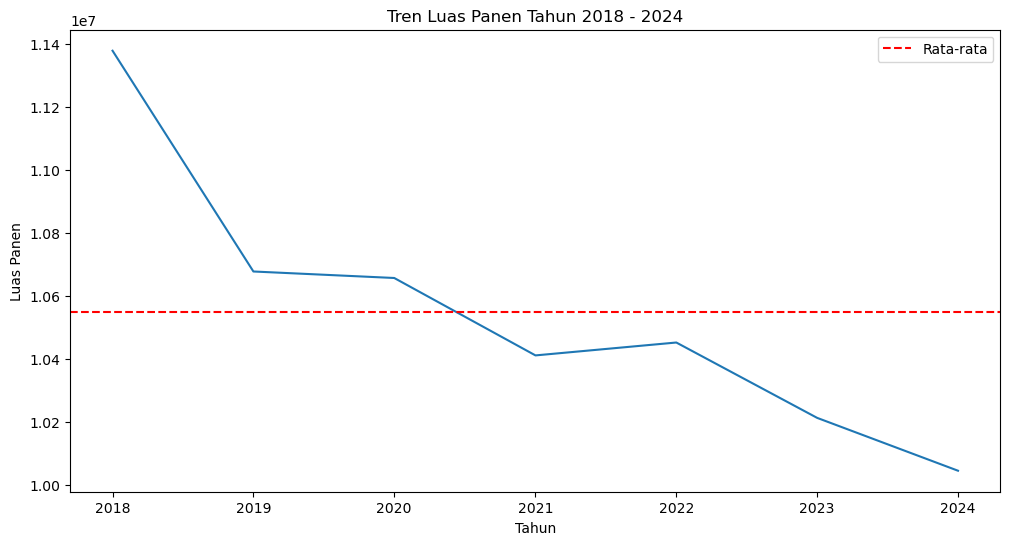

In [ ]:
# Membuat Group
yearly = df_skip.groupby("Tahun")["Luas Panen (ha)"].sum()

# Membuat Plot
plt.figure(figsize=(12,6))
sns.lineplot(x=yearly.index, y=yearly.values)
plt.axhline(y=yearly.mean(), color="r", linestyle="--", label="Rata-rata")
plt.title("Tren Luas Panen Tahun 2018 - 2024")
plt.xlabel("Tahun")
plt.ylabel("Luas Panen")
plt.legend()
plt.show()

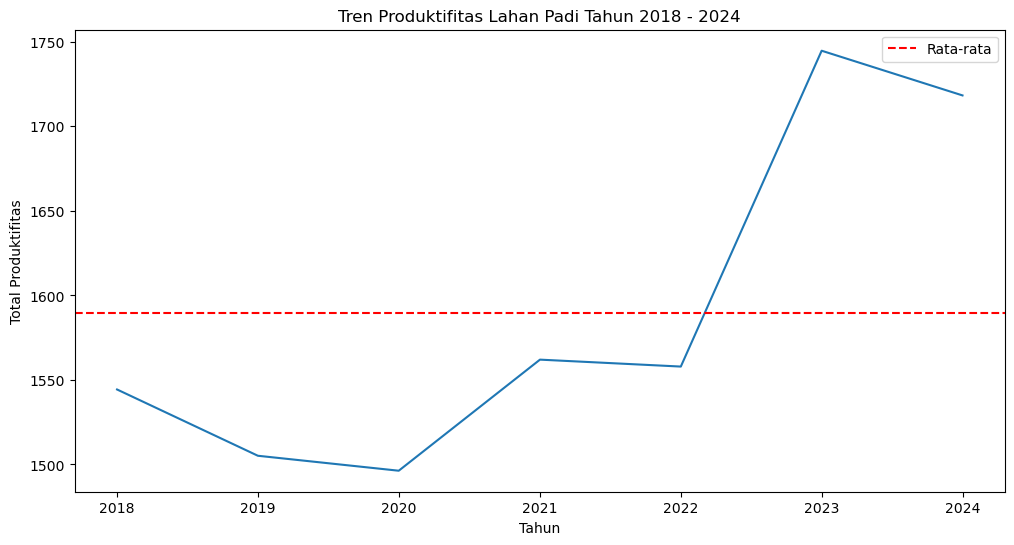

In [17]:
# Membuat Group date dan sum sales
yearly = df_skip.groupby("Tahun")["Produktivitas (ku/ha)"].sum()

# Membuat Plot
plt.figure(figsize=(12,6))
sns.lineplot(x=yearly.index, y=yearly.values)
plt.axhline(y=yearly.mean(), color="r", linestyle="--", label="Rata-rata")
plt.title("Tren Produktifitas Lahan Padi Tahun 2018 - 2024")
plt.xlabel("Tahun")
plt.ylabel("Total Produktifitas")
plt.legend()
plt.show()

### Tren penurunan produksi padi

Dari grafik diatas, ditemukan bahwa produksi padi di Indonesia dalam 7 tahun terakhir mengalami penurunan. Penurunan produksi padi dapat menyebabkan kenaikan harga beras.
Penurunan produksi padi dapat diduga karena adanya penurunan dari luas area panen.
Salah satu penyebab berkurangnya Luas Area Panen adalah dikarenakan adanya alih fungsi lahan pertanian. Alih fungsi lahan pertanian menyebabkan berkurangnya lahan pertanian yang juga menyebabkan adanya penurunan unit usaha pertanian. Dikutip dari Tempo.co "Pada 2023, jumlah usaha pertanian di Indonesia mencapai 29,3 juta unit usaha. Jumlah itu turun sebesar 7,42 persen dibandingkan data 2013 yang berjumlah 31,7 juta unit."